Converged after 7769 iterations
Learned theta: [ 0.39843597  2.57929567 -2.71555479]


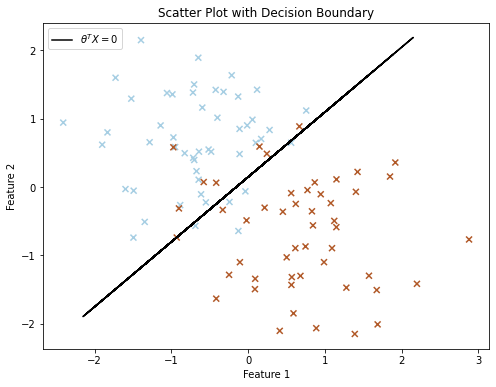

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading data from CSV files
X_data = pd.read_csv("logisticX.csv", header=None).values
y_data = pd.read_csv("logisticY.csv", header=None).values.flatten()

# Normalizing the feature data
X_normalized = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)

X_bias = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

# Initialize parameters
num_features = X_normalized.shape[1]
theta = np.zeros(num_features + 1)

# Definining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations and learning rate
max_iterations = 10000
learning_rate = 0.001
convergence_threshold = 0.00001  # Set your desired convergence threshold

# Logistic regression using Hessian for parameter updates with convergence criterion
prev_theta = np.copy(theta)
iteration = 0
while iteration < max_iterations:
    z = np.dot(X_bias, theta)
    h = sigmoid(z)
    
    gradient = np.dot(X_bias.T, (y_data - h))
    
    # Calculating Hessian matrix
    diag = h * (1 - h)
    hessian = np.dot(X_bias.T * diag, X_bias)
    
    # Updating parameters using the Hessian matrix
    delta_theta = learning_rate * np.dot(np.linalg.inv(hessian), gradient)
    theta += delta_theta
    
    # Calculating the element-wise difference in theta and check for convergence
    delta_theta_diff = np.abs(prev_theta - theta)
    if np.all(delta_theta_diff < convergence_threshold):
        print("Converged after", iteration + 1, "iterations")
        break
    
    prev_theta = np.copy(theta)
    iteration += 1

# Printing the learned parameters
print("Learned theta:", theta)

# Plotting the scatter plot and decision boundary
slope = -theta[1] / theta[2]
intercept = -theta[0] / theta[2]

plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_data, cmap=plt.cm.Paired, marker='x')
plt.plot(X_normalized[:, 1], slope * X_normalized[:, 1] + intercept, color='black', label='$\\theta^TX = 0$')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot with Decision Boundary")
plt.legend()
plt.show()

    
